套件

In [1]:
import requests,json
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

爬資料 : hahow > 語言

In [2]:
url1 ='https://api.hahow.in/api/group/language/courses?page=1'
res1 = requests.get(url1,headers={'User-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36'})
resjson1 = json.loads(res1.text)

In [3]:
url2 ='https://api.hahow.in/api/group/language/courses?page=2'
res2 = requests.get(url2,headers={'User-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36'})
resjson2 = json.loads(res2.text)

In [ ]:
# resjson1['data'][1]['status']
# resjson1['data'][0]['numRating']
# resjson1['data'][0]['numSoldTickets']
# resjson1['data'][0]['preOrderedPrice']
# resjson1['data'][0]['price']

### 篩選已經開的課

In [ ]:
SUCCESS=0 #即將開課
PUBLISHED=0 #已經開課
INCUBATING=0 #還有一段時間才開課
for i in range(24):
    status = resjson1['data'][i]['status']
    if status == 'SUCCESS':
        SUCCESS+=1
    elif status == 'PUBLISHED':
        PUBLISHED+=1
    elif status == 'INCUBATING':
        INCUBATING+=1

In [ ]:
for i in range(23):
    status = resjson2['data'][i]['status']
    if status == 'SUCCESS':
        SUCCES+=1
    elif status == 'PUBLISHED':
        PUBLISHED+=1
    elif status == 'INCUBATING':
        INCUBATING+=1

In [ ]:
PUBLISHED

43

圓餅圖 [Ref_link](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f)

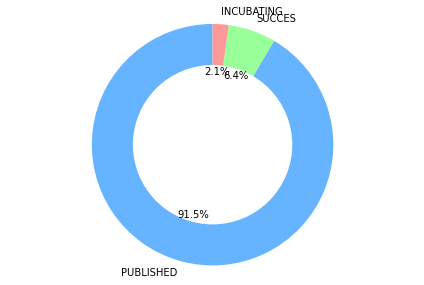

In [ ]:
labels = ['PUBLISHED', 'SUCCES', 'INCUBATING']
sizes = [43,3,1]
colors = ['#66b3ff','#99ff99','#ff9999']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0,0),0.66,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 資料整理 

購買人數 & 評論數量

In [ ]:
tickets = []
commets = []

In [ ]:
for i in range(4,24):
    sign = resjson1['data'][i]['numSoldTickets']
    commet_num = resjson1['data'][i]['numRating']
    tickets.append(sign)
    commets.append(commet_num)

In [ ]:
for i in range(23):
    sign = resjson2['data'][i]['numSoldTickets']
    commet_num = resjson1['data'][i]['numRating']
    tickets.append(sign)
    commets.append(commet_num)

價錢 預購價錢 折購

In [ ]:
prices = []
preprices = []
discounts = []

In [ ]:
for i in range(4,24):
    price = resjson1['data'][i]['price']
    preprice = resjson1['data'][i]['preOrderedPrice']
    dis = price - preprice
    prices.append(price)
    preprices.append(preprice)
    discounts.append(dis)

In [ ]:
for i in range(23):
    price = resjson2['data'][i]['price']
    preprice = resjson2['data'][i]['preOrderedPrice']
    dis = price - preprice
    prices.append(price)
    preprices.append(preprice)
    discounts.append(dis)

dataframe

In [ ]:
import pandas as pd
course = pd.DataFrame(list(zip(tickets,commets,prices,preprices,discounts))
                     ,columns=['tickets','commets','prices','preprices','discount'])

In [ ]:
# course.describe()

In [ ]:
course[['tickets','commets']].corr()

,tickets,commets
tickets,1.000000,0.665852
commets,0.665852,1.000000


## 購買課程數量vs評論數量 散點圖

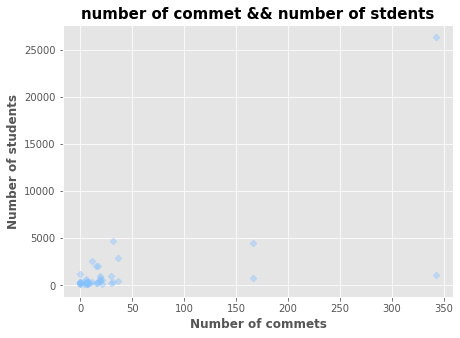

In [ ]:
 plt.figure(figsize=(7,5))  

plt.style.use("ggplot")     
plt.xlabel("Number of commets", fontweight = "bold")                  
plt.ylabel("Number of students", fontweight = "bold")   
plt.title("number of commet && number of stdents",
          fontsize = 15, fontweight = "bold")        
plt.scatter(commets,                            # x軸資料
            tickets,                      # y軸資料
            c = "#84C1FF",                  # 點顏色
            s = 25,                      # 點大小
            alpha = .4,                    # 透明度
            marker = "D")                   # 點樣式

plt.show()

### 以課程價錢(分別)觀察購買次數＆留言數量的相關程度

價錢分佈

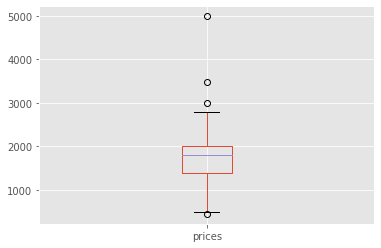

In [ ]:
course.boxplot(column='prices')

高價錢的課程離群值不多，但是資料本身也不大，所以把價錢高的outlier分別分一類比較好

其餘就依照數量平分成高價,中間價,低價

所以分成4類來比較


1.高價outlier
2.高價
3.中間價
4.低價

In [ ]:
dec_course = course.sort_values(by=['prices'],ascending=False)

高價outlier

In [ ]:
price_outlier = dec_course[:3]

In [ ]:
price_outlier[['tickets','commets']].corr()  #只有三筆資料 所以雖然相關係數很高，但未必能完全解釋相關程度很高

,tickets,commets
tickets,1.000000,-0.991839
commets,-0.991839,1.000000


高價

In [ ]:
price_high = dec_course[3:16]

In [ ]:
price_high[['tickets','commets']].corr()

,tickets,commets
tickets,1.000000,0.956953
commets,0.956953,1.000000


中間價


In [ ]:
price_mid = dec_course[16:29]

In [ ]:
price_mid[['tickets','commets']].corr()

,tickets,commets
tickets,1.000000,0.888577
commets,0.888577,1.000000


低價

In [ ]:
price_low = dec_course[29:]

In [ ]:
price_low[['tickets','commets']].corr()

,tickets,commets
tickets,1.000000,0.154483
commets,0.154483,1.000000


#### 結果:高價相關性>中間價相關性>>>低價相關性

### 預購價＆原價 >>> 折扣比較

In [ ]:
sort_course=course.sort_values(by=['prices'])

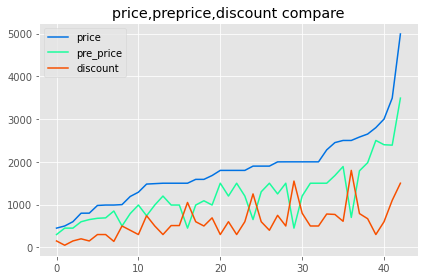

In [ ]:
plt.plot(list(sort_course['prices']),color='#0072E3',label='price')
plt.plot(list(sort_course['preprices']),color='#1AFD9C',label='pre_price')
plt.plot(list(sort_course['discount']),color='#F75000',label='discount')
plt.title('price,preprice,discount compare')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 結果:雖然整體折扣趨勢還是有跟著價錢提升，但是越貴的課不一定折扣越多